In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import Risk_Kit as erk
import numpy as np
import pandas as pd

ind = erk.get_ind_returns()
er = erk.annualized_rets(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

In [3]:
def plot_ef(n_points, er, cov, style=".-"):
    
    if er.shape[0] != 2 or er.shape[0] != 2:
        raise ValueError("plot_ef 2 can only plot 2-asset frontiers")
    
    weights = minimize_vol(target_return)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame ({"Returns":rets,"Volatility":vols})
    
    return ef.plot.line(x="Volatility", y ="Returns", style=style,color = "#A2142F")

In [4]:
from scipy.optimize import minimize

<AxesSubplot:xlabel='Volatility'>

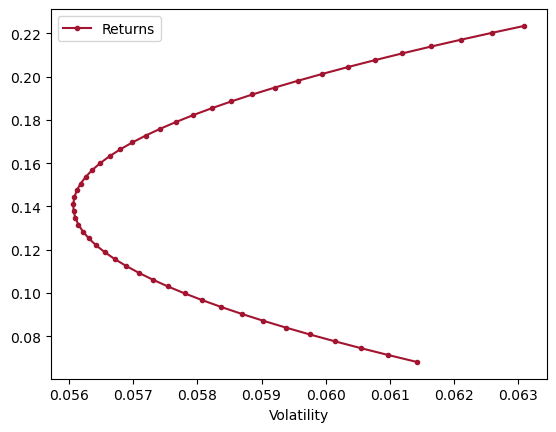

In [5]:
l = ["Games","Fin"]
erk.plot_ef2(50,er[l], cov.loc[l,l])

In [6]:
def target_is_met(w, er):
    return target_return - erk.portfolio_return(w, er)


def minimize_vol(target_return, er, cov):
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.00),)*n
    return_is_target = {
        'type': 'eq',
        'args':(er,),
        'fun': lambda weights, er: target_return - erk.portfolio_return(weights, er)
    }
    weights_sum_to_1 = {
        'type':'eq',
        'fun':lambda weights:np.sum(weights) -1
    }
    results = minimize(erk.portfolio_vol, init_guess,
                       args=(cov,), method="SLSQP",
                       options={'disp':False},
                       constraints=(return_is_target, weights_sum_to_1),
                       bounds=bounds
                      )    
    return results.x

In [7]:
w15 = minimize_vol(0.15, er[l], cov.loc[l,l])
vol15 = erk.portfolio_vol( w15, cov.loc[l,l])
vol15

0.056163669406706564

In [8]:
w15

array([0.47287631, 0.52712369])

In [10]:
erk.minimize_vol(0.12, er[l], cov.loc[l,l])

array([0.66622525, 0.33377475])

In [22]:
def optimal_weights(n_points, er, cov):
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights
    

def plot_ef(n_points, er, cov, style=".-"):
    
    weights = optimal_weights(n_points, er, cov)
    rets = [erk.portfolio_return(w, er) for w in weights]
    vols = [erk.portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame ({"Returns":rets,"Volatility":vols})
    
    return ef.plot.line(x="Volatility", y ="Returns", style=style,color = "#A2142F")

<AxesSubplot:xlabel='Volatility'>

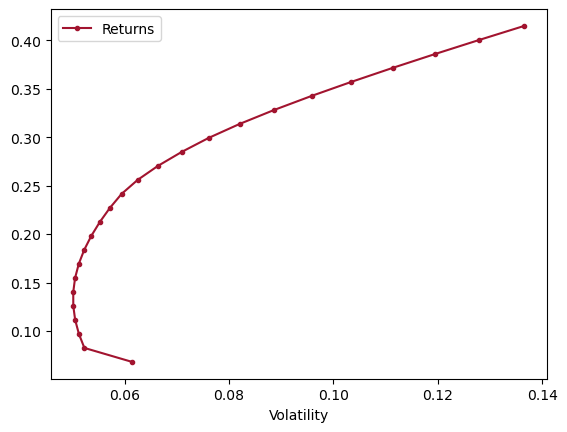

In [25]:
l = ["Smoke","Fin","Games","Coal"]

plot_ef(25, er[l], cov.loc[l,l,])

<AxesSubplot:xlabel='Volatility'>

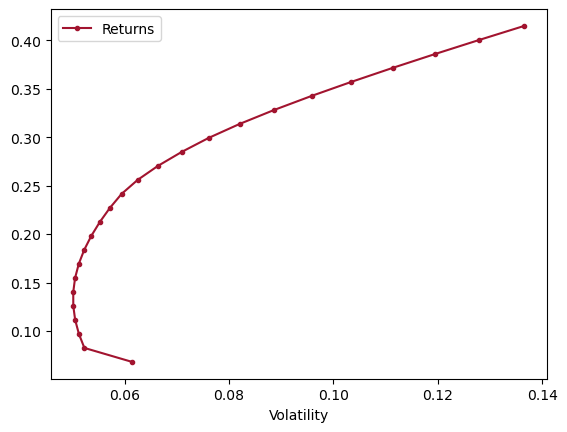

In [27]:
erk.plot_ef(25, er[l], cov.loc[l,l,])